# Movie Box_office_gross_prediction


In [4]:
#import the necessary libraries
import pandas as pd #data manipulation
import numpy as np #Numerical Analysis
import seaborn as sns #data visualization
import json #for reading json object
import matplotlib.pyplot as plt #data visualization
import pickle # For saving the model file
from wordcloud import WordCloud #to create word clouds
from ast import literal_eval #to evaluate the string as pyhton expression

## 1. Reading the dataset

In [5]:
#Reading the dataset by using pandas read_csv function
credits=pd.read_csv("tmdb_5000_credits.csv")

In [6]:
movies_df=pd.read_csv("tmdb_5000_movies.csv")

## 2.Exploratory Data Analysis

In [7]:
#head() gives us first  5 rows of the dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
credits.tail()

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [9]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
#columns in the dataset
print("credits:",credits.columns)
print("movies_df:",movies_df.columns)

credits: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
movies_df: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [11]:
#Shape of the dataset
print("credits:",credits.shape)
print("movies_df:",movies_df.shape)


credits: (4803, 4)
movies_df: (4803, 20)


### Merging the two datasets

#id column in movies_df is similar to movie_id in credits dataset.Let us merge these two datasets, movie_df and credits using 
common key.Therefore rename the column movie_id in credits to id.


In [12]:
#Renaming the columns
credits_column_renamed=credits.rename(index=str,columns={"movie_id":"id"})
movies=movies_df.merge(credits_column_renamed,on="id")

In [13]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
movies.shape

(4803, 23)

In [15]:
#information about the datset
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [13]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Converting JSON into strings

We see the cast ,crew,genres,keywords are in json format.so need to convert these json objects to meaning form

In [16]:
    
# changing the crew column from json to string    
movies['crew'] = movies['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies['crew'] = movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)

In [17]:

from ast import literal_eval
features = ['keywords','genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)


In [18]:
# Returns the top 1 element or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 1:
            names = names[:1]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [19]:
print (type(movies.loc[0, 'genres']))

<class 'list'>


In [20]:
features = ['keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [21]:
movies['genres']

0            [Action]
1         [Adventure]
2            [Action]
3            [Action]
4            [Action]
            ...      
4798         [Action]
4799         [Comedy]
4800         [Comedy]
4801               []
4802    [Documentary]
Name: genres, Length: 4803, dtype: object

In [22]:
movies['genres']  = movies['genres'] .str.join(', ')

In [23]:
movies['genres'] 

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801               
4802    Documentary
Name: genres, Length: 4803, dtype: object

In [24]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250000000,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260000000,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


now let us see the shape of the merged dataset,We can movies has 23 features

In [25]:
print("movies:",movies.shape)

movies: (4803, 23)


In [26]:
#corr() is to find the relationship between the columns
movies.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


### Checking for null values

In [27]:
movies.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title_x                 False
vote_average            False
vote_count              False
title_y                 False
cast                    False
director                 True
dtype: bool

In [28]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                  30
dtype: int64

<AxesSubplot:>

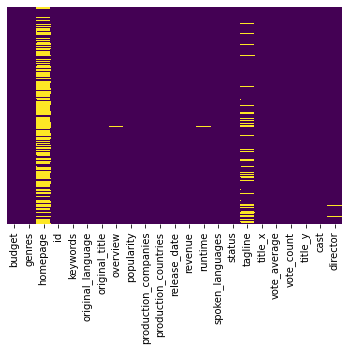

In [29]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can see,home page and tagline have null values,but they have least importance and can be ignored

But ,as director and run time are important features and has only 30 nulls and 2 nulls,Dropping the rows with null values

In [30]:
#Dropping the null values
movies = movies.dropna(subset = ['director','runtime'])


In [31]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3063
id                         0
keywords                   0
original_language          0
original_title             0
overview                   1
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  820
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                   0
dtype: int64

In [32]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250000000,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260000000,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


The numbers in the budget and revenue are too big, compromising its readability. Let's convert the unit of the budget and revenue columns from $ to million $ first

In [33]:
#Divide the revenue and budget columns by 1000000 to convert $ to million $
movies["revenue"]=movies["revenue"].floordiv(1000000)
movies["budget"]=movies["budget"].floordiv(1000000)

In [34]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [35]:
#As there cannot be any movie with budget as o,let us remove the rows with budget as 0
movies = movies[movies['budget'] != 0]


In [36]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 4758
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3573 non-null   int64  
 1   genres                3573 non-null   object 
 2   homepage              1410 non-null   object 
 3   id                    3573 non-null   int64  
 4   keywords              3573 non-null   object 
 5   original_language     3573 non-null   object 
 6   original_title        3573 non-null   object 
 7   overview              3573 non-null   object 
 8   popularity            3573 non-null   float64
 9   production_companies  3573 non-null   object 
 10  production_countries  3573 non-null   object 
 11  release_date          3573 non-null   object 
 12  revenue               3573 non-null   int64  
 13  runtime               3573 non-null   float64
 14  spoken_languages      3573 non-null   object 
 15  status               

In [37]:
#Let us create three new columns and extract date,month and Day of the week from the release date
movies['release_date'] = pd.DataFrame(pd.to_datetime(movies['release_date'],dayfirst=True))
movies['release_month'] = movies['release_date'].dt.month
movies['release_DOW'] = movies['release_date'].dt.dayofweek

### Data visualization

Runtime

Text(0.5, 1.0, 'Boxplot of Runtime')

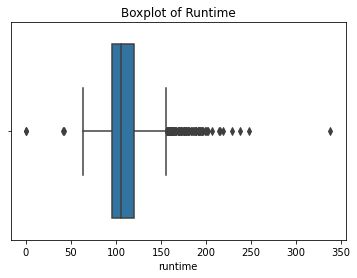

In [38]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime')

Text(0.5, 1.0, 'Boxplot of Revenue')

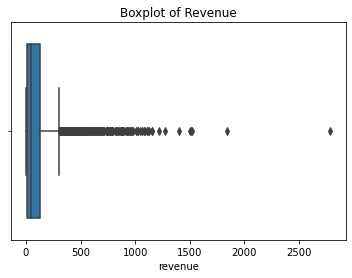

In [39]:
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot of Revenue')

budget

Text(0.5, 1.0, 'Boxplot of Budget')

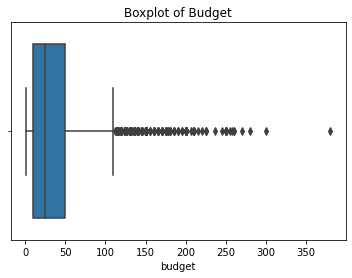

In [40]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget')

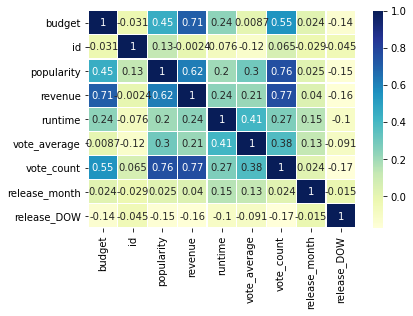

In [41]:
sns.heatmap(movies.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

we see that the output to be predicted "Revenue" depends more on budget,popularity and vote_count columns as they have correlation >=0.5
Well, this explains that revenue is strongly correlated with the budget of the movies, and runtime is least correlated with revenue.So we can say that Budget of movie is directly related for the revenue generated.


Let’s plot the distribution of revenue using seaborn distplot.

the data in revenue column is very skewed and therefore it is difficult to draw a conclusion from this graph. we need to normalize this data. Therefore we will be normalizing it using log transformation.

In [42]:
#creating log transformation for reveune
movies['log_revenue'] = np.log1p(movies['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value
movies['log_budget'] = np.log1p(movies['budget'])

Let’s compare our value Revenue and log transformation of revenue using the seaborn library.

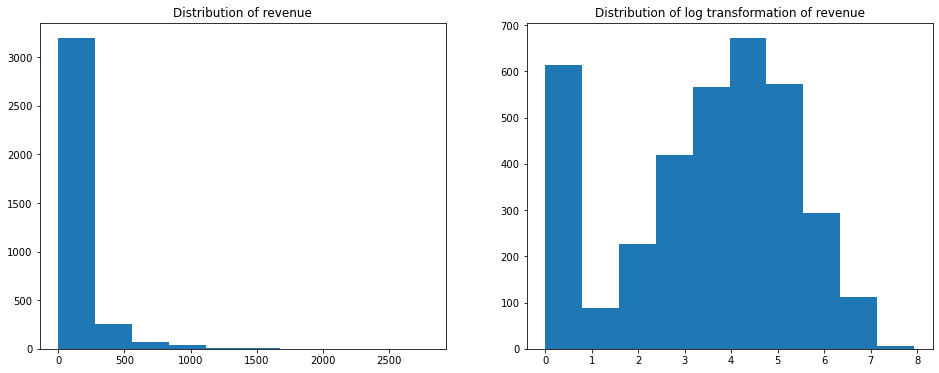

In [43]:
#comapring distribution of reveune and log revune side by side with histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) 
plt.hist(movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(movies['log_revenue']);
plt.title('Distribution of log transformation of revenue');

We can see that original distribution i.e (one without log) is extremely skewed. We used the log transformation method and made data normally distributed which has less skewness and kurtosis.

### Relationship between Film Revenue and Budget.
Let’s examine the relationship using a scatter plot.

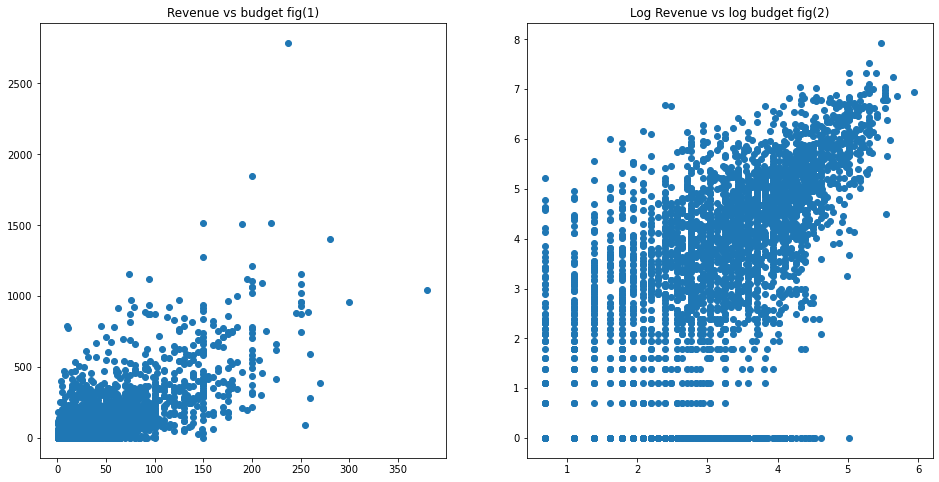

In [44]:
#let's create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies['budget'], movies['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(movies['log_budget'], movies['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

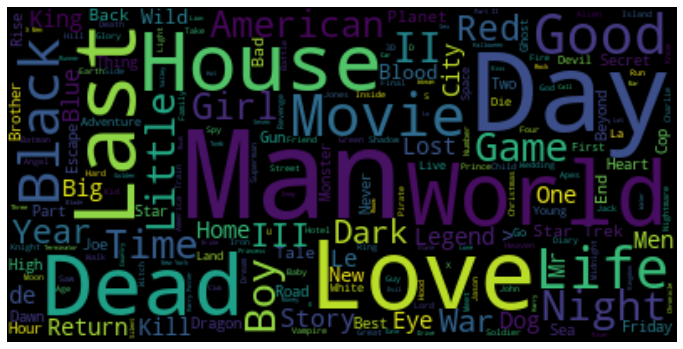

In [45]:
wordcloud = WordCloud().generate(movies.original_title.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that the most popular word are Man, Last, Love, La, Life, Death, and so on. The most popular or frequent words are bigger in size.

### Relationship between the home page and Revenue.
Let’s find if having a home page affects revenue or not. And for that lets first find out movies have a home page or not.

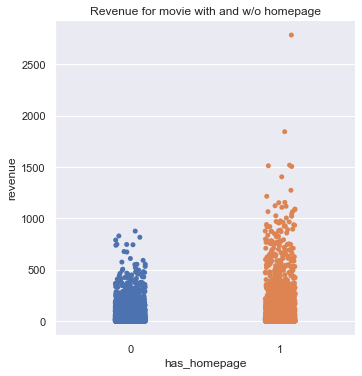

In [46]:
#let's creat column called has_homepage and pass two value 1,0 (1, indicates has home page, 0 indicates no page)
movies['has_homepage'] = 0
movies.loc[movies['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page
#since has_homepage is categorical value we will be using seaborn catplot.
sns.catplot(x='has_homepage', y='revenue', data=movies);
plt.title('Revenue for movie with and w/o homepage');

From the above fig, we can see that movie that has a home page (indicated by blue) has more revenue compared to the movie that has no home page. From this scatterplot, we can say that they may be correlated.BUt as it has many null values dropping the home page column

C:\Users\pamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


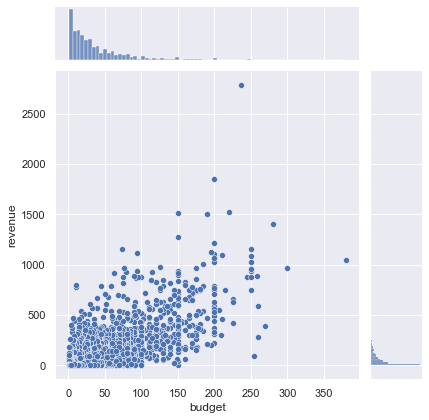

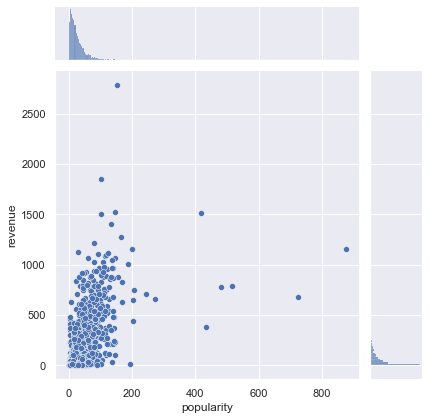

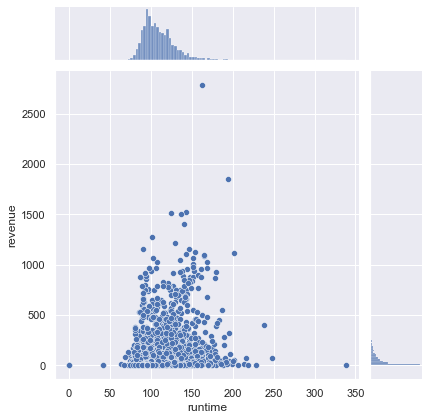

In [47]:
sns.jointplot(movies.budget, movies.revenue);
sns.jointplot(movies.popularity, movies.revenue);
sns.jointplot(movies.runtime, movies.revenue);
plt.show()


#### Relationship between release_month and revenue

C:\Users\pamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'revenue')

<Figure size 1080x576 with 0 Axes>

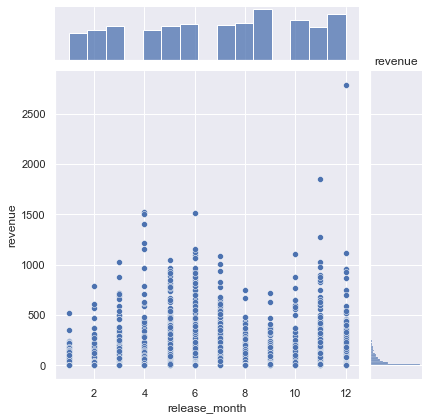

In [48]:
plt.figure(figsize=(15,8))
sns.jointplot(movies.release_month, movies.revenue);
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('revenue')


In [49]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 4758
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3573 non-null   int64         
 1   genres                3573 non-null   object        
 2   homepage              1410 non-null   object        
 3   id                    3573 non-null   int64         
 4   keywords              3573 non-null   object        
 5   original_language     3573 non-null   object        
 6   original_title        3573 non-null   object        
 7   overview              3573 non-null   object        
 8   popularity            3573 non-null   float64       
 9   production_companies  3573 non-null   object        
 10  production_countries  3573 non-null   object        
 11  release_date          3573 non-null   datetime64[ns]
 12  revenue               3573 non-null   int64         
 13  runtime           

Dropping the columns which are not required for analysis

In [50]:
movies_box = movies.drop(['homepage','id','keywords','original_language','original_title','overview','production_companies',
                     'production_countries','release_date','spoken_languages','status','tagline',
                     'title_x','title_y','cast','log_revenue','log_budget','has_homepage'],axis = 1)

In [51]:
movies_box.isnull().sum()

budget           0
genres           0
popularity       0
revenue          0
runtime          0
vote_average     0
vote_count       0
director         0
release_month    0
release_DOW      0
dtype: int64

### Handling Categorical data


In [52]:
movies_box.dtypes

budget             int64
genres            object
popularity       float64
revenue            int64
runtime          float64
vote_average     float64
vote_count         int64
director          object
release_month      int64
release_DOW        int64
dtype: object

In [53]:
movies_box.head()

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,Action,150.437577,2787,162.0,7.2,11800,James Cameron,12,3
1,300,Adventure,139.082615,961,169.0,6.9,4500,Gore Verbinski,5,5
2,245,Action,107.376788,880,148.0,6.3,4466,Sam Mendes,10,0
3,250,Action,112.312950,1084,165.0,7.6,9106,Christopher Nolan,7,0
4,260,Action,43.926995,284,132.0,6.1,2124,Andrew Stanton,3,2


### Label Encoding 
•	Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [54]:
# Label encoding features to change categorical variables into numerical one
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
cat=['director','genres']
for i in movies_box[cat]:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(movies_box[i])) #getting the classes values before transformation
    movies_box[i] = LE.fit_transform(movies_box[i]) # trannsforming our text classes to numerical values
    print(c(movies_box[i])) #getting the classes values after transformation

LABEL ENCODING OF: director
Counter({'Steven Spielberg': 27, 'Clint Eastwood': 19, 'Ridley Scott': 16, 'Martin Scorsese': 16, 'Woody Allen': 16, 'Steven Soderbergh': 15, 'Renny Harlin': 15, 'Robert Rodriguez': 15, 'Tim Burton': 14, 'Oliver Stone': 14, 'Robert Zemeckis': 13, 'Michael Bay': 12, 'Ron Howard': 12, 'Joel Schumacher': 12, 'Tony Scott': 12, 'Brian De Palma': 12, 'Francis Ford Coppola': 12, 'Barry Levinson': 11, 'Bobby Farrelly': 11, 'David Fincher': 10, 'Shawn Levy': 10, 'Richard Donner': 10, 'Chris Columbus': 10, 'Paul W.S. Anderson': 10, 'Rob Reiner': 10, 'Joel Coen': 10, 'Wes Craven': 10, 'Kevin Smith': 10, 'Richard Linklater': 10, 'Sam Raimi': 9, 'Peter Jackson': 9, 'Rob Cohen': 9, 'M. Night Shyamalan': 9, 'John McTiernan': 9, 'Spike Lee': 9, 'John Carpenter': 9, 'Christopher Nolan': 8, 'Bryan Singer': 8, 'Brett Ratner': 8, 'Martin Campbell': 8, 'Roland Emmerich': 8, 'Quentin Tarantino': 8, 'Simon West': 8, 'Dennis Dugan': 8, 'Adam Shankman': 8, 'F. Gary Gray': 8, 'Antoin

In [55]:
mapping_dict ={} 
category_col=["director","genres"]
for col in category_col: 
    LE_name_mapping = dict(zip(LE.classes_, 
                        LE.transform(LE.classes_))) 
  
    mapping_dict[col]= LE_name_mapping 
    print(mapping_dict)

{'director': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}
{'director': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}, 'genres': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}


In [56]:
movies_box.head()

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,0,150.437577,2787,162.0,7.2,11800,616,12,3
1,300,1,139.082615,961,169.0,6.9,4500,536,5,5
2,245,0,107.376788,880,148.0,6.3,4466,1345,10,0
3,250,0,112.312950,1084,165.0,7.6,9106,245,7,0
4,260,0,43.926995,284,132.0,6.1,2124,65,3,2


### Splitting the Dataset into Dependent and Independent variable
•	In machine learning, the concept of dependent variable (y) and independent variables(x) is important to understand. Here, Dependent variable is nothing but output in dataset and independent variable is all inputs in the dataset. 
•	With this in mind, we need to split our dataset into the matrix of independent variables and the vector or dependent variable. Mathematically, Vector is defined as a matrix that has just one column.

In [57]:
#Dependent Variables
x=movies_box.iloc[:,[0,1,2,4,5,6,7,8,9]]
x=pd.DataFrame(x,columns=['budget','genres','popularity','runtime','vote_average','vote_count','director'
                          ,'release_month','release_DOW'])
x

,budget,genres,popularity,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,0,150.437577,162.0,7.2,11800,616,12,3
1,300,1,139.082615,169.0,6.9,4500,536,5,5
2,245,0,107.376788,148.0,6.3,4466,1345,10,0
3,250,0,112.312950,165.0,7.6,9106,245,7,0
4,260,0,43.926995,132.0,6.1,2124,65,3,2
...,...,...,...,...,...,...,...,...,...
4586,35,3,38.100488,99.0,5.8,923,1534,5,2
4596,6,10,19.331884,89.0,6.0,316,468,12,2
4682,13,10,4.009379,95.0,4.6,24,446,1,4
4720,8,6,9.452808,120.0,6.5,178,1085,9,4


In [58]:
#Dependent Variables
y=movies_box.iloc[:,3]
y=pd.DataFrame(y,columns=['revenue'])
y

,revenue
0,2787
1,961
2,880
3,1084
4,284
...,...
4586,170
4596,0
4682,0
4720,15


### Feature Scaling

there is huge disparity between the x values so we use feature scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 4.6119201 , -1.10962   ,  3.53184628, ..., -0.46236379,
         1.48974933, -0.11265796],
       [ 6.07901328, -0.88369987,  3.20720932, ..., -0.63226827,
        -0.57429457,  1.39493336],
       [ 4.79821765, -1.10962   ,  2.30074366, ...,  1.08589076,
         0.9000225 , -2.37404493],
       ...,
       [-0.60441118,  1.14958124, -0.65451776, ..., -0.82341081,
        -1.75374823,  0.6411377 ],
       [-0.72084715,  0.24590074, -0.4988908 , ...,  0.53370121,
         0.60515909,  0.6411377 ],
       [-0.81399592,  2.50510198,  0.02172764, ...,  1.62746128,
        -1.1640214 ,  1.39493336]])

In [60]:

pickle.dump(sc,open("scalar_movies.pkl","wb"))

## splitting the data to train and test
Let us allocate allocate 80% of the dataset to training set and the remaining 20% to test set.


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

## Model Building
Let us build a model using linear regression algorithm 

In [62]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [63]:
x_test

array([[ 0.02434304, -0.43185963,  0.08863398, ..., -0.72783954,
         0.31029567,  0.6411377 ],
       [ 0.02434304,  0.24590074, -0.46284717, ..., -0.43687812,
         1.48974933, -1.62024927],
       [-0.62769838,  0.24590074,  0.01199324, ...,  0.64201531,
        -1.45888481, -0.11265796],
       ...,
       [ 0.39693813, -1.10962   ,  0.24511761, ..., -1.75576163,
        -1.1640214 ,  0.6411377 ],
       [-0.69755995,  2.50510198, -0.57822433, ..., -0.86163932,
         1.19488592,  0.6411377 ],
       [ 1.14212831, -0.88369987,  0.37839529, ...,  1.38959501,
         0.31029567,  0.6411377 ]])

In [64]:
y_test[0:5]

,revenue
1045,95
1974,0
2883,12
117,474
3074,3


In [65]:
y_pred_mr=mr.predict(x_test)
y_pred_mr[0:5]


array([[9.84737546e+01],
       [1.02323905e+02],
       [5.61664235e+01],
       [4.87424644e+02],
       [3.41534770e-01]])

In [66]:
3.76955224*100000000

376955224.0

In [67]:
y_test

,revenue
1045,95
1974,0
2883,12
117,474
3074,3
...,...
3949,11
252,227
807,113
3209,0


### Model_Evaluation
Finally, we need to check to see how well our model is performing on the test data.

In [68]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_mr))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred_mr)))

MAE: 56.52764663167956
RMSE: 7.518486990856575


In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.7174505906933415

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, random_state = 42)
rf.fit(x_train, y_train)
y_pred_mr=mr.predict(x_test)
r2_score(y_test,y_pred_mr)

<ipython-input-70-a5805ee7c040>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


0.7174505906933415

### Saving the model
After building the model we have to save the model.
Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. 

In [71]:
import pickle
pickle.dump(mr,open("model_movies.pkl","wb"))

In [72]:
model=pickle.load(open("model_movies.pkl","rb"))
scalar=pickle.load(open("scalar_movies.pkl","rb"))

In [73]:
input=[[50,8,20.239061,88,5,366,719,7,3]]
input=scalar.transform(input)
prediction = model.predict(input)

In [74]:
prediction

array([[88.42348926]])

In [75]:
mr.score(x_test,y_test)

0.7174505906933415

we have got 71 % accuracy by using linear regression algorithm